In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/My Drive/Python/Machine_Learning/PCA/Images/Butterfly.jpg'

In [ ]:
from PIL import Image

# Load the image using PIL
image = Image.open(image_path)

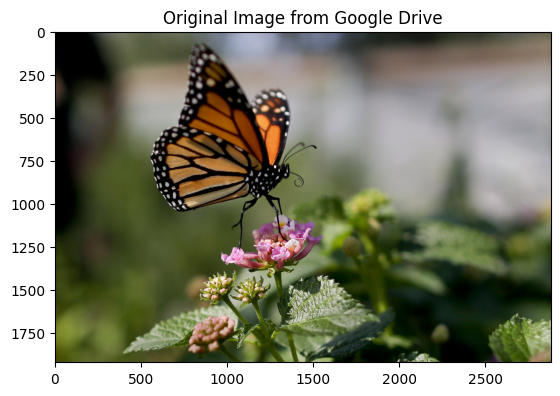

In [ ]:
# Display the image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title('Original Image from Google Drive')
plt.show()

In [ ]:
# Step 1: Standardization
import numpy as np
from PIL import Image

# Convert the image to grayscale and convert to NumPy array
image_gray = np.array(image.convert('L'))


In [ ]:
# Step 1: Standardization
mean_value = np.mean(image_gray)
std_dev = np.std(image_gray)
image_std = (image_gray - mean_value) / std_dev


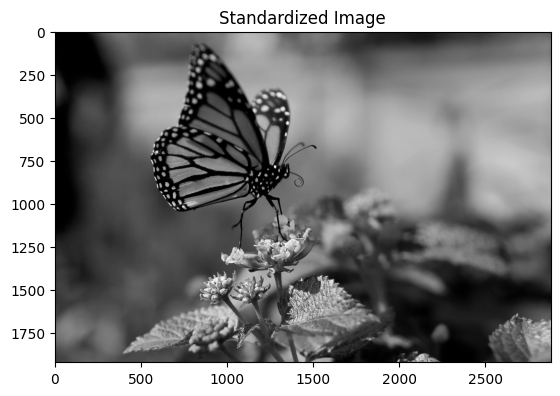

In [ ]:
# Visualize the standardized image
plt.imshow(image_std, cmap='gray')
plt.title('Standardized Image')
plt.show()


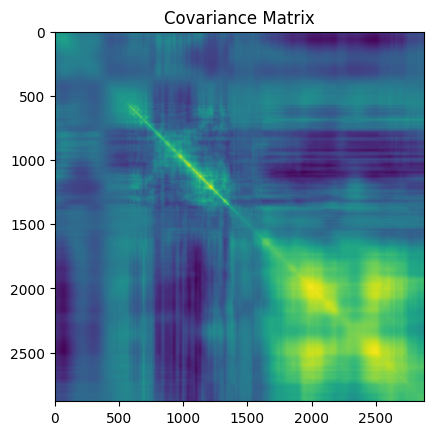

In [ ]:
# Step 2: Covariance Matrix
cov_matrix = np.cov(image_std, rowvar=False)

# Visualize the Covariance Matrix
plt.imshow(cov_matrix, cmap='viridis')
plt.title('Covariance Matrix')
plt.show()

In [ ]:
# Step 3: Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

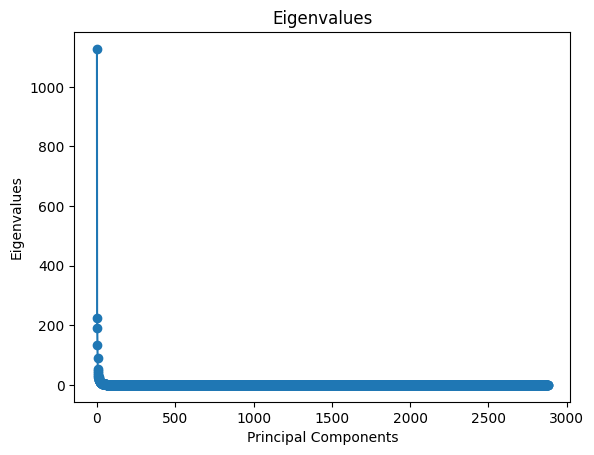

In [ ]:
# Visualize the eigenvalues
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:
# Step 5: Select Principal Components and Projection

# List of values for k (number of principal components)
k_values = [256, 128, 64, 32, 16, 8 , 4, 2]

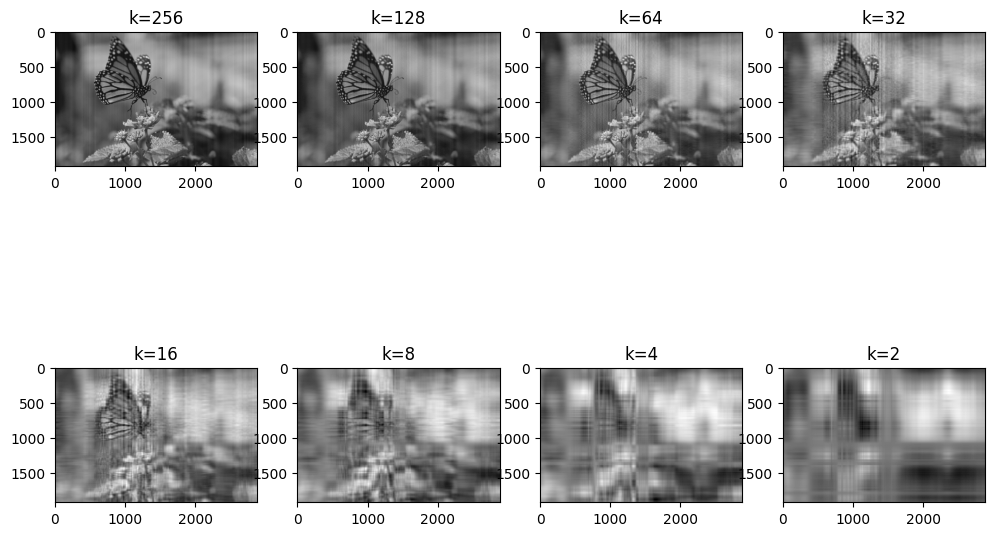

In [ ]:
# Visualize reconstructed images for different values of k
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    # Select the top k eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Project the standardized data onto the new subspace
    image_pca = np.dot(image_std, selected_eigenvectors)

    # Reconstruct the image from the PCA projection
    reconstructed_image = np.dot(image_pca, selected_eigenvectors.T)

    # Display the reconstructed image
    plt.subplot(2, len(k_values)//2, i)
    plt.imshow(np.real(reconstructed_image), cmap='gray')  # Taking the real part
    plt.title(f'k={k}')

plt.show()

Why did we choose k (2-256)
